## Imports and Data Prep

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [43]:
games = pd.read_csv('data/games.csv')
games.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


In [44]:
plays = pd.read_csv('data/plays.csv')
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [45]:
games.columns

Index(['gameId', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr',
       'visitorTeamAbbr', 'week'],
      dtype='object')

In [46]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [47]:
# outer join on gameId to merge the two dataframes
plays_full = games.merge(plays, how='outer', on='gameId', suffixes=('_games', '_plays'))
plays_full.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,playId,playDescription,quarter,down,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,09/06/2018,20:20:00,PHI,ATL,1,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,09/06/2018,20:20:00,PHI,ATL,1,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,09/06/2018,20:20:00,PHI,ATL,1,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,09/06/2018,20:20:00,PHI,ATL,1,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [48]:
def defensive_team(row):
    """Returns the defensive team as determined by the posession team compared agains the home and visitor teams."""
    
    if row.possessionTeam == row.homeTeamAbbr:
        return row.visitorTeamAbbr
    else:
        return row.homeTeamAbbr

In [49]:
# create defensiveTeam column using custom function built above
plays_full['defensiveTeam'] = plays_full.apply(defensive_team, axis=1)

# check to see how things look
plays_full[['possessionTeam','defensiveTeam','homeTeamAbbr','visitorTeamAbbr']].head()

,possessionTeam,defensiveTeam,homeTeamAbbr,visitorTeamAbbr
0,ATL,PHI,PHI,ATL
1,ATL,PHI,PHI,ATL
2,ATL,PHI,PHI,ATL
3,ATL,PHI,PHI,ATL
4,ATL,PHI,PHI,ATL


In [50]:
plays_full.columns

Index(['gameId', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr',
       'visitorTeamAbbr', 'week', 'playId', 'playDescription', 'quarter',
       'down', 'yardsToGo', 'possessionTeam', 'playType', 'yardlineSide',
       'yardlineNumber', 'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa', 'isDefensivePI',
       'defensiveTeam'],
      dtype='object')

## Overall distribution

In [51]:
plays_full.numberOfPassRushers.describe()

count    18606.000000
mean         4.216543
std          0.897862
min          0.000000
25%          4.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: numberOfPassRushers, dtype: float64

Mean of 4.21 and median of 4, data nicely concentrated around both central measures.

In [52]:
plays_full.numberOfPassRushers.value_counts(normalize=True)

4.0     0.619209
5.0     0.195958
3.0     0.085833
6.0     0.061056
2.0     0.013598
7.0     0.013007
0.0     0.005697
1.0     0.003923
8.0     0.001612
9.0     0.000054
10.0    0.000054
Name: numberOfPassRushers, dtype: float64

About 62% of the data explainable by 4 pass rushers; about 97% explainable by 3-6 pass rushers.

Text(0.5, 1.0, 'Number of pass rushers histogram')

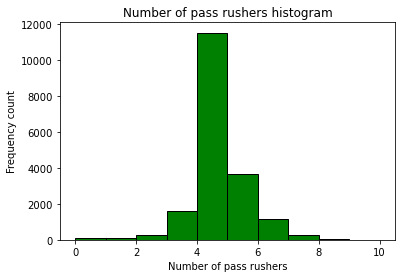

In [53]:
# distribution for number of pass rushers across all games and plays
plt.hist(plays_full.numberOfPassRushers, color='g', edgecolor='black')
plt.xlabel('Number of pass rushers')
plt.ylabel('Frequency count')
plt.title('Number of pass rushers histogram')

Histogram shows a nice bell curve shaped distribution concentrated around 4.

## Distribution by defensive team

In [54]:
plays_full.groupby('defensiveTeam')['numberOfPassRushers'].mean().sort_values()

defensiveTeam
DET    4.003711
LAC    4.023423
IND    4.041451
CHI    4.074018
HOU    4.094340
OAK    4.116090
CIN    4.135922
SEA    4.138686
NYG    4.166667
TEN    4.166960
GB     4.170475
MIN    4.172764
SF     4.180970
JAX    4.196262
WAS    4.199313
ATL    4.199352
DAL    4.205172
KC     4.218354
TB     4.246935
PHI    4.256716
BUF    4.257143
LA     4.259649
MIA    4.262082
NE     4.295419
DEN    4.296364
NYJ    4.302782
NO     4.317590
BAL    4.332795
CLE    4.338906
CAR    4.369449
PIT    4.417349
ARI    4.422868
Name: numberOfPassRushers, dtype: float64

Not too much deviation when examining mean by defensive team, data fairly concentrated with respect to this variable.

Text(0.5, 1.0, 'Average number of pass rushers by defensive team')

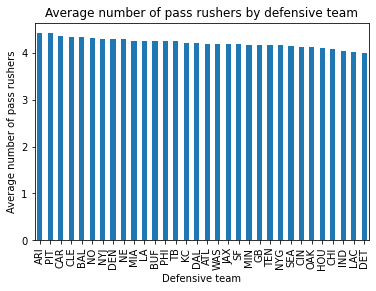

In [55]:
plays_full.groupby('defensiveTeam')['numberOfPassRushers'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Defensive team')
plt.ylabel('Average number of pass rushers')
plt.title('Average number of pass rushers by defensive team')

Text(0.5, 1.0, 'Average number of pass rushers by defensive team')

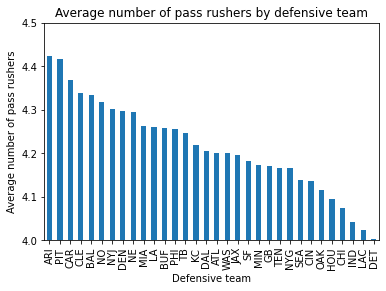

In [56]:
plays_full.groupby('defensiveTeam')['numberOfPassRushers'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylim((4,4.5))
plt.xlabel('Defensive team')
plt.ylabel('Average number of pass rushers')
plt.title('Average number of pass rushers by defensive team')

The first visualization shows that there's not much deviation among defensive teams; the second appears to show the opposite but only as a result of shrinking the y axis. A good reminder about the dangers of scaling differently and misrepresenting the data!

Text(0.5, 1.0, 'Median number of pass rushers by defensive team')

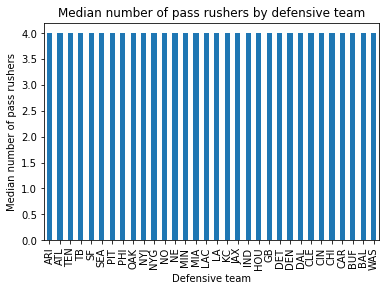

In [57]:
# data viz check to see if median distribution different
plays_full.groupby('defensiveTeam')['numberOfPassRushers'].median().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Defensive team')
plt.ylabel('Median number of pass rushers')
plt.title('Median number of pass rushers by defensive team')

The median distribution of pass rushers by defensive team is uniform.

In [58]:
# create crosstab to count occurence of number of pass rushers for each defensive team
defensive_team_crosstab = pd.crosstab(index=plays_full.defensiveTeam, columns=plays_full.numberOfPassRushers)
defensive_team_crosstab

numberOfPassRushers,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
defensiveTeam,,,,,,,,,,,
ARI,4,1,7,27,279,182,42,9,0,0,0
ATL,4,0,2,56,387,138,29,1,0,0,0
BAL,5,3,12,51,310,181,43,13,1,0,0
BUF,1,2,2,30,352,101,33,4,0,0,0
CAR,3,0,1,26,332,162,32,6,1,0,0
CHI,6,5,12,71,429,106,22,11,0,0,0
CIN,5,7,11,41,414,97,39,3,1,0,0
CLE,4,2,9,73,342,148,53,26,1,0,0
DAL,3,0,1,21,430,99,23,3,0,0,0


Text(0.5, 1.0, 'Heat map - pass rushers by defensive team')

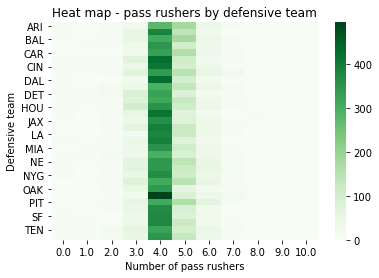

In [59]:
# use resulting crosstab to create heatmap
sns.heatmap(defensive_team_crosstab, cmap='Greens', color='seagreen')
plt.xlabel('Number of pass rushers')
plt.ylabel('Defensive team')
plt.title('Heat map - pass rushers by defensive team')

The heatmap nicely shows how concentrated the data is by defensive team. Using 4 pass rushers is the most common with nearby values of 3, 5, and 6 having some notable counts too.

In [60]:
# strip out 0-2 and 7-10 since majority of data covered by 3-6
# shown earlier in the notebook and in the above heatmap
reduced_defensive_team_crosstab = defensive_team_crosstab[[3.0,4.0,5.0,6.0]]

Text(0.5, 1.0, 'Heat map - pass rushers by defensive team')

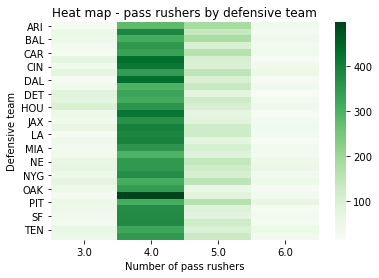

In [61]:
sns.heatmap(reduced_defensive_team_crosstab, cmap='Greens', color='seagreen')
plt.xlabel('Number of pass rushers')
plt.ylabel('Defensive team')
plt.title('Heat map - pass rushers by defensive team')

Stripping out some of the groups makes for a cleaner visualization and easier interpretation. There's not too much deviation in terms of counts by defensive team. No obvious pattern or trend jumps out other than how concentrated the data is for 4 pass rushers.

Text(0.5, 1.0, 'Heat map - pass rushers by defensive team')

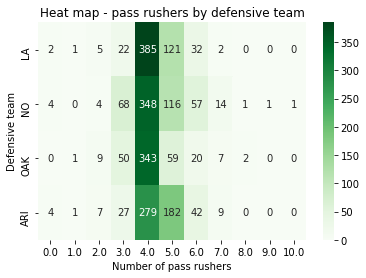

In [62]:
# same initial heatmap but with top and bottom two teams of the 2018 season
sns.heatmap(defensive_team_crosstab.loc[['LA','NO','OAK','ARI']], annot=True, fmt='g',
            cmap='Greens', color='seagreen')
plt.xlabel('Number of pass rushers')
plt.ylabel('Defensive team')
plt.title('Heat map - pass rushers by defensive team')

This chart mimics the first heat map by using all values for number of pass rushers but instead focusing on the top two (LA, NO) and bottom two (OAK, ARI) teams, respectively. Let's clean this up a little bit more.

Text(0.5, 1.0, 'Heat map - pass rushers by defensive team')

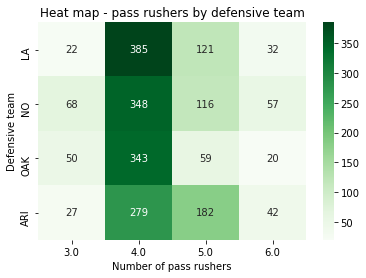

In [63]:
# strip out 0-2 and 7-10 since majority of data covered by 3-6
sns.heatmap(reduced_defensive_team_crosstab.loc[['LA','NO','OAK','ARI']], annot=True, fmt='g',
            cmap='Greens', color='seagreen')
plt.xlabel('Number of pass rushers')
plt.ylabel('Defensive team')
plt.title('Heat map - pass rushers by defensive team')

Stripping out some of the groups as done before helps make the visualization neater. LA seems to have the greatest use of 4 pass rushers of the shown teams whereas ARI has the least (not to mention the greatest use of 5 pass rushers).

## Distribution by pass result

Note the following definitions:

C: Complete pass

I: Incomplete pass

S: Quarterback sack

IN: Intercepted pass

In [64]:
# create crosstab to count occurence of pass results by number of pass rushers
pass_result_crosstab = pd.crosstab(index=plays_full.numberOfPassRushers, columns=plays_full.passResult, margins=False)
pass_result_crosstab

passResult,C,I,IN,S
numberOfPassRushers,,,,
0.0,22,83,0,1
1.0,64,8,1,0
2.0,183,64,3,3
3.0,1067,446,36,48
4.0,7204,3338,268,711
5.0,2041,1206,66,333
6.0,555,427,24,130
7.0,118,86,7,31
8.0,12,15,1,2


In [65]:
# create aggreagted column for all non-completed (NC) passes
pass_result_crosstab['NC'] = pass_result_crosstab['I'] + pass_result_crosstab['IN'] + pass_result_crosstab['S']

# drop components for cleaner visualizations
pass_result_crosstab.drop(['I','IN','S'], axis=1, inplace=True)
pass_result_crosstab.columns = ['Completed','Non-completed']
pass_result_crosstab

,Completed,Non-completed
numberOfPassRushers,,
0.0,22,84
1.0,64,9
2.0,183,70
3.0,1067,530
4.0,7204,4317
5.0,2041,1605
6.0,555,581
7.0,118,124
8.0,12,18


Text(0.5, 1.0, 'Heat map - pass result by pass rushers')

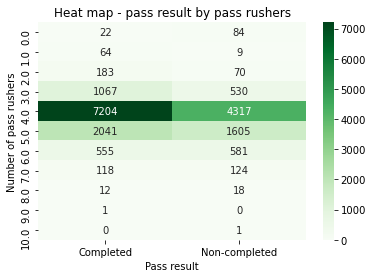

In [66]:
sns.heatmap(pass_result_crosstab, annot=True, fmt='g', cmap='Greens', color='seagreen')
plt.xlabel('Pass result')
plt.ylabel('Number of pass rushers')
plt.title('Heat map - pass result by pass rushers')

Earlier visualizations have already shown how concentrated the data is around 4 pass rushers, and this visualization shows the same concentration for both completed and non-comleted passes.

What does this mean? With some football context, this verifies that using 4 pass rushers is a common occurence in games, so much so that that both completed and non-completed passes end up having the same distribution when split. A nice check that how football is played conicides with the data!

Text(0.5, 1.0, 'Heat map - pass result by pass rushers')

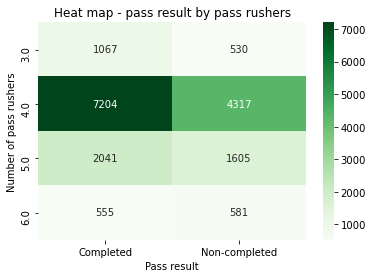

In [67]:
# strip out 0-2 and 7-10 since majority of data covered by 3-6
sns.heatmap(pass_result_crosstab.loc[[3.0,4.0,5.0,6.0]], annot=True, fmt='g', cmap='Greens', color='seagreen')
plt.xlabel('Pass result')
plt.ylabel('Number of pass rushers')
plt.title('Heat map - pass result by pass rushers')

Nothing novel found by limiting the number of pass rushers but a good attempt anyway since doing so cleans up the visualization.

In [68]:
# pivot table contiang mean number of pass rushers by defenesive team for all play results
team_pass_result = pd.pivot_table(plays_full, values='numberOfPassRushers', index='defensiveTeam',
                                  columns='passResult')
team_pass_result

passResult,C,I,IN,S
defensiveTeam,,,,
ARI,4.335294,4.455128,5.333333,4.816327
ATL,4.142494,4.290698,4.133333,4.405405
BAL,4.270030,4.370044,4.583333,4.558140
BUF,4.190323,4.355828,4.187500,4.416667
CAR,4.320113,4.395062,4.384615,4.742857
CHI,4.007958,4.091346,3.962963,4.560000
CIN,4.102828,4.131148,4.250000,4.500000
CLE,4.320611,4.330189,4.250000,4.621622
DAL,4.150273,4.240964,4.222222,4.564103


Text(0.5, 1.0, 'Heat map - average number of pass rushers')

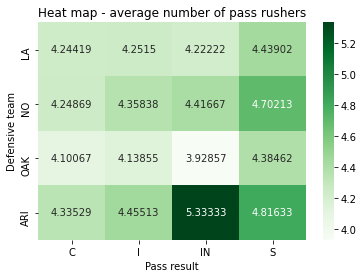

In [69]:
sns.heatmap(team_pass_result.loc[['LA','NO','OAK','ARI']], annot=True, fmt='g', cmap='Greens', color='seagreen')
plt.xlabel('Pass result')
plt.ylabel('Defensive team')
plt.title('Heat map - average number of pass rushers')

On average, ARI playing defensive has a higher number of pass rushers for their interceptions compared to the top two teams and the other bottom team.

## Distribution by offensive play result

Text(0.5, 1.0, 'Average yards gained per pass given number of pass rushers')

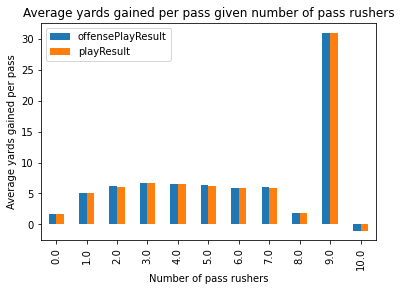

In [70]:
plays_full.groupby('numberOfPassRushers')[['offensePlayResult','playResult']].mean().plot(kind='bar')
plt.xlabel('Number of pass rushers')
plt.ylabel('Average yards gained per pass')
plt.title('Average yards gained per pass given number of pass rushers')

It's tempting to look at some of the smaller and larger values for average yards gained per pass, but recall that most of the data is concentrated among 3-6 pass rushers with 4 being the most common. Anything else has fewer occurences and is subject to extreme values / outliers more easily.

Text(0.5, 1.0, 'Average offensive yards gained per pass given number of pass rushers')

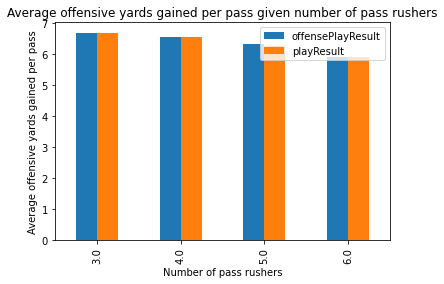

In [71]:
# strip out 0-2 and 7-10 since majority of data covered by 3-6
plays_full.groupby('numberOfPassRushers')[['offensePlayResult','playResult']].mean().loc[[3.0,4.0,5.0,6.0]].plot(kind='bar')
plt.xlabel('Number of pass rushers')
plt.ylabel('Average offensive yards gained per pass')
plt.title('Average offensive yards gained per pass given number of pass rushers')

Removing the other groups makes for a clearer visualization. As the number of pass rushers increases, the average offensive yards gained per pass decreases. The trend is more apparent here since the scaling better reflects the vast majority of the data.

Note that a football field is 100 yards and that game starts at the 50 yard line. This helps put into perspective the importance of the offensive team gaining fewer yards on average should the defensive team employ more pass rushers. One less yard can be consequential in slowing the offensive team.

In [72]:
# mean offensive play result (i.e., average offensive yards gained) by defensive team
offensive_play_results = plays_full.groupby(['numberOfPassRushers','defensiveTeam'])['offensePlayResult'].mean().loc[[3.0,4.0,5.0,6.0]].unstack().T
offensive_play_results

numberOfPassRushers,3.0,4.0,5.0,6.0
defensiveTeam,,,,
ARI,4.851852,6.379928,5.747253,5.285714
ATL,5.339286,7.082687,6.608696,4.482759
BAL,7.313725,5.496774,4.790055,6.558140
BUF,5.933333,5.750000,3.881188,5.242424
CAR,8.230769,7.740964,5.932099,3.312500
CHI,6.563380,5.517483,5.103774,2.954545
CIN,7.000000,7.091787,7.628866,7.051282
CLE,5.315068,6.494152,6.885135,5.924528
DAL,6.714286,6.883721,5.484848,3.652174


Text(0.5, 1.0, 'Heat map - average offensive yards gained per pass')

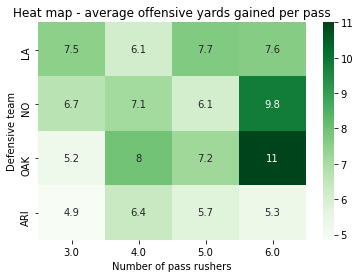

In [73]:
sns.heatmap(offensive_play_results.loc[['LA','NO','OAK','ARI']], annot=True, cmap='Greens', color='seagreen')
plt.xlabel('Number of pass rushers')
plt.ylabel('Defensive team')
plt.title('Heat map - average offensive yards gained per pass')

This heatmap shows the average offensive yards gained per pass for a defensive team given the number of pass rushers used. Lower numbers here are interpreted as the defensive team preventing the offensive team from gaining much yardage compared to higher numbers that mean the defensive team is giving up more yardage.

There's not a compelling story here, but it's worth noting that OAK gives up the most offenisve yards on average when using 4 pass rushers compared to the other teams in the visualization.

## Distribution by EPA

In [74]:
# epa is expected points added and refers to the difference between what the offensive team made vs. what was expected
plays_full.groupby('numberOfPassRushers')['epa'].mean()

numberOfPassRushers
0.0     0.100113
1.0     0.009476
2.0     0.090525
3.0     0.033899
4.0    -0.016059
5.0    -0.001357
6.0    -0.068839
7.0     0.108385
8.0    -0.422645
9.0     3.179283
10.0   -0.200337
Name: epa, dtype: float64

Text(0.5, 1.0, 'Average EPA by number of pass rushers')

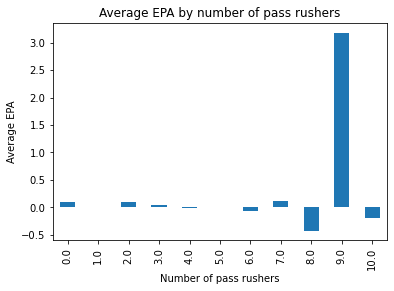

In [75]:
plays_full.groupby('numberOfPassRushers')['epa'].mean().plot(kind='bar')
plt.xlabel('Number of pass rushers')
plt.ylabel('Average EPA')
plt.title('Average EPA by number of pass rushers')

Reading the above visualization is a bit hard, so a second pass with a subset of number of pass rushers should help.

Text(0.5, 1.0, 'Average EPA by number of pass rushers')

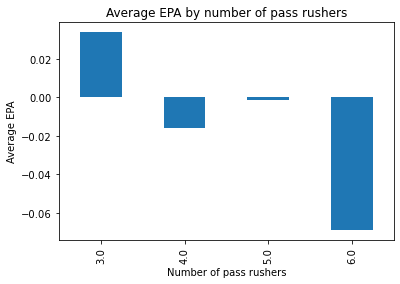

In [76]:
plays_full[plays_full['numberOfPassRushers'].isin([3.0,4.0,5.0,6.0])].groupby('numberOfPassRushers')['epa'].mean().plot(kind='bar')
plt.xlabel('Number of pass rushers')
plt.ylabel('Average EPA')
plt.title('Average EPA by number of pass rushers')

There's a nice narrative here.
- With 3 pass rushers, the offensive team beats expectations on average.
- With 4-6 pass rushers, the offensive team doesn't beat expectations on average. In fact, they miss expectations by varying amounts.

This visualization aligns with an earlier one showing the relationship between averaged offensive yards gained per pass and number of pass rushers. In short, the defensive team gives up fewer yards by employing more pass rushers and in doing forces a lower EPA for the offensive team.

In [77]:
most_freq_pass_rusher_combo = plays_full[plays_full['numberOfPassRushers'].isin([3,4,5,6])]

In [78]:
team_pass_epa = pd.pivot_table(plays_full[plays_full['numberOfPassRushers'].isin([3,4,5,6])], values='epa',
                               index='defensiveTeam', columns='numberOfPassRushers')
team_pass_epa

numberOfPassRushers,3.0,4.0,5.0,6.0
defensiveTeam,,,,
ARI,0.100966,0.063776,-0.084702,-0.371800
ATL,-0.114559,0.042970,0.057413,-0.129725
BAL,0.199609,-0.097751,-0.275329,-0.113688
BUF,0.293873,-0.149762,-0.500885,-0.008517
CAR,0.497777,0.098960,-0.013206,-0.432067
CHI,-0.348225,-0.099919,-0.258086,-0.574895
CIN,-0.315366,0.124549,0.063493,0.582741
CLE,-0.160907,-0.052990,-0.019245,-0.118730
DAL,0.200878,0.067592,-0.189678,-0.710250


Text(0.5, 1.0, 'Heat map - average EPA')

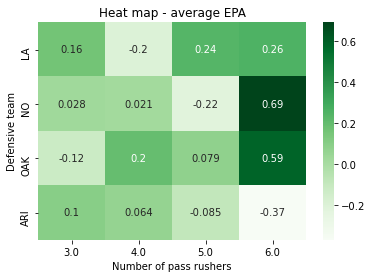

In [79]:
sns.heatmap(team_pass_epa.loc[['LA','NO','OAK','ARI']], annot=True, cmap='Greens', color='seagreen')
plt.xlabel('Number of pass rushers')
plt.ylabel('Defensive team')
plt.title('Heat map - average EPA')

The last visualization explores average EPA by defensive team and number of pass rushers for the best and worst two teams, respectively. Focusing on 4 pass rushers, the most common, the best two teams force a lower EPA for the offensive team compared to the worst two teams. In other words, the best two teams are more effective at using 4 pass rushers and control the game better defensively.